<a href="https://colab.research.google.com/github/magicWiss/ML-course/blob/Regression/Ex_02_regressione_lineare_testo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corso di Intelligenza Artificiale @ UniRoma3
## Codice Esercitazione \#2 Regressione lineare - con soluzioni

#### Parte del codice è tratto e riadattato dal seguente testo: Hands-on Machine Learning with Scikit-Learn and TensorFlow (O'Reilly book)

In [1]:
# Controllo sulla versione di Python (≥3.5)
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Installa Scikit-Learn (≥0.20)
import sklearn
assert sklearn.__version__ >= "0.20"

Funzione di supporto per ricavare valori PIL <-> Livello di Soddisfazione, suddivisi per nazione.


In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # seleziono solo i record con INEQUALITY = TOT
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    # aggrego i valori 'Value' per ogni paese 'Country'
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    # rinomino il campo 2015 in GDP per capita
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    # creo una tabella join in base al campo Country delle due tabelle
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Impostiamo una directory di lavoro `datasets/lifesat`.

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# Impostiamo i grafici in modalità inline
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
# Eseguo il download dei csv già elaborati
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Carico i DataFrame dai file csv
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")




In [8]:
print (oecd_bli.head())

  LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total        PC  Percentage               0   
2       L   Value        TOT      Total        PC  Percentage               0   
3       L   Value        TOT      Total        PC  Percentage               0   
4       L   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Va

In [9]:
print (gdp_per_capita.head())


               Country                                 Subject Descriptor  \
0          Afghanistan  Gross domestic product per capita, current prices   
1              Albania  Gross domestic product per capita, current prices   
2              Algeria  Gross domestic product per capita, current prices   
3               Angola  Gross domestic product per capita, current prices   
4  Antigua and Barbuda  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
3  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
4  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

        2015  Estimates Start After  
0    599.994                 2013.0 

In [10]:
# Ricavo i dati X,y
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

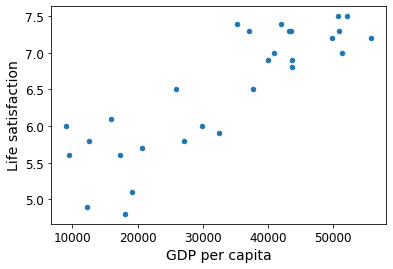

In [11]:
# Visualizzo i dati X,y
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


# *Esercizio \#1*: crea e addestra un modello lineare con funzione di costo RSS

In [14]:
#creazione di un modello lineare e addestramento con RSS
linear_reg=sklearn.linear_model.LinearRegression()
linear_reg.fit(X,y)


Coefficienti: [[4.91154459e-05]]


# *Esercizio \#2*: visualizza i parametri del modello

In [15]:
print("Coefficienti:",linear_reg.coef_)

Coefficienti: [[4.91154459e-05]]


# *Esercizio \#3*: prendi tre campioni random dal dataset e ricava la predizione in base al modello addestrato

In [26]:
country_stats.head()
x_test=[[9054.914],[9437.372],[12239.894]]
y_test=[6,5.6,4.9]
y_predicted=linear_reg.predict(x_test)

# *Esercizio \#4*: calcola RSS MSE e RMSE valutando i tre campioni

In [29]:
#calcolo delle metriche
from sklearn.metrics import mean_squared_error
import math

#RSS->non presente è la differenza tra i valori reali e quelli predetti al quadrato
rss_eval=np.sum(np.square(y_test-y_predicted))

#MSS->presente nelle metriche
mse_eval=mean_squared_error(y_test,y_predicted)

#RMSE->è il quadrato della mse
rmse=math.sqrt(mse_eval)

print("RSS:",rss_eval)
print("MSS:",mse_eval)
print("RMSE",rmse)

RSS: 2.089890991078192
MSS: 0.29353048891512384
RMSE 0.5417845410447993


# *Esercizio \#5*: suddividi il dataset in input in train e test con un rapporto 80/20

In [42]:
#suddivisione del dataset in traing e testing set
from sklearn.model_selection import train_test_split
training_x,testing_x,train_y,testing_y=train_test_split(X,y,test_size=0.2)
train_y
testing_y

array([[5.7],
       [7.4],
       [5.6],
       [6.5],
       [7.3],
       [7.3]])

# *Esercizio \#6*: addestra nuovamente il modello, e ricava RSS MSE e RMSE sui test set

In [48]:
#si effettua l'addestramento sui dati di training
model = sklearn.linear_model.LinearRegression()

model.fit(training_x,train_y)
print("W1: ",model.coef_,"W0:",model.intercept_)


#predizione su dati di testing
y_predict=model.predict(testing_x)
y_predict

#RSS
rss_eval=np.sum(np.square(testing_y-y_predict))

#MSS
mss=mean_squared_error(testing_y,y_predict)

#RMSS
rmse=math.sqrt(mss)
print("RSS:",rss_eval)
print("MSS:",mss)
print("RMSE",rmse)

W1:  [[4.82568866e-05]] W0: [4.83081379]
RSS: 1.087670989741824
MSS: 0.18127849829030399
RMSE 0.42576812737721925


# *Esercizio \#7*: suddividi nuovamente il dataset ma con un rapporto 50/50. Valuta nuovamente le performance del modello e discuti eventuali differenze nei valori ottenuti.

In [52]:
x_50_train, x_50_test, y_50_train, y_50_test=train_test_split(X,y,test_size=0.5)

model.fit(x_50_train, y_50_train)

LinearRegression()

In [53]:
y_50_predict=model.predict(x_50_test)

In [54]:
#mse
mse_50=mean_squared_error(y_50_test,y_50_predict)

In [55]:
print("MSE (80,20):",mse_eval, "MSE(50,50):",mse_50)

MSE (80,20): 0.29353048891512384 MSE(50,50): 0.2468537694694798
